In [128]:
# Import semua yang dibutuhkan

import folium
import geopandas
import geodatasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from folium import plugins

In [129]:
def print_dfinfo(df: pd.DataFrame, dup: list | None = None):
    print('Jumlah duplikasi: ', df.duplicated(dup).sum())
    print('----------------------------------------------------------')
    print('Jumlah NaN: ')
    print(df.isna().sum())
    print('----------------------------------------------------------')
    df.info()
    print('----------------------------------------------------------')
    print(df.describe())

In [130]:
order_df = pd.read_csv('/home/archie/Machine-Learning/Datasets/E-Commerce_Public_Dataset/orders_dataset.csv')

print_dfinfo(order_df)

Jumlah duplikasi:  0
----------------------------------------------------------
Jumlah NaN: 
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order

In [131]:
# Cek order_reviews_dataset.csv

order_reviews_df = pd.read_csv('/home/archie/Machine-Learning/Datasets/E-Commerce_Public_Dataset/order_reviews_dataset.csv')

print_dfinfo(order_reviews_df)

Jumlah duplikasi:  0
----------------------------------------------------------
Jumlah NaN: 
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), o

In [132]:
order_items_df = pd.read_csv('/home/archie/Machine-Learning/Datasets/E-Commerce_Public_Dataset/order_items_dataset.csv')

print_dfinfo(order_items_df)

Jumlah duplikasi:  0
----------------------------------------------------------
Jumlah NaN: 
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
-----------------------------

In [133]:
# Cek products_dataset.csv

product_df = pd.read_csv('/home/archie/Machine-Learning/Datasets/E-Commerce_Public_Dataset/products_dataset.csv')

print_dfinfo(product_df)

Jumlah duplikasi:  0
----------------------------------------------------------
Jumlah NaN: 
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64
----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g 

In [134]:
# Cek product_category_name_translation.csv

product_name_tr_df = pd.read_csv('/home/archie/Machine-Learning/Datasets/E-Commerce_Public_Dataset/product_category_name_translation.csv')

print('Jumlah duplikasi: ', product_name_tr_df.duplicated().sum())
print('----------------------------------------------------------')
print('Jumlah NaN:')
print(product_name_tr_df.isna().sum())
print('----------------------------------------------------------')
product_name_tr_df.info()
print('----------------------------------------------------------')
print(product_name_tr_df.head())
print('----------------------------------------------------------')
product_name_tr_df.describe()

Jumlah duplikasi:  0
----------------------------------------------------------
Jumlah NaN:
product_category_name            0
product_category_name_english    0
dtype: int64
----------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
----------------------------------------------------------
    product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor
----------------------------------------------------------


product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top             beleza_saude                 health_beauty
freq                       1                             1

In [135]:
# customers_dataset.csv

customer_df = pd.read_csv('/home/archie/Machine-Learning/Datasets/E-Commerce_Public_Dataset/customers_dataset.csv')

print_dfinfo(customer_df)

Jumlah duplikasi:  0
----------------------------------------------------------
Jumlah NaN: 
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
----------------------------------------------------------
       customer_zip_code_prefix
count              99441.000000
mean               35137.4

In [136]:
# customers_dataset.csv

geoloc_df = pd.read_csv('/home/archie/Machine-Learning/Datasets/E-Commerce_Public_Dataset/geolocation_dataset.csv')

print_dfinfo(geoloc_df, ['geolocation_lat', 'geolocation_lng'])

Jumlah duplikasi:  281700
----------------------------------------------------------
Jumlah NaN: 
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
----------------------------------------------------------
       geol

In [137]:
# Bersihkan "order_df"

# Menghilangkan kolom yang tidak diperlukan
order_df.drop(
    columns=[
        'order_approved_at', 
        'order_delivered_carrier_date', 
        'order_delivered_customer_date', 
        'order_estimated_delivery_date'
    ],
    inplace=True
)

order_df['order_purchase_timestamp'] = pd.to_datetime(order_df['order_purchase_timestamp'])

order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  99441 non-null  object        
 1   customer_id               99441 non-null  object        
 2   order_status              99441 non-null  object        
 3   order_purchase_timestamp  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ MB


In [139]:
# Bersihkan "order_reviews_df"

# Menghilangkan beberapa kolom yang tidak dibutuhkan
order_reviews_df.drop(
    columns=[
        'review_comment_title',       
        'review_comment_message',     
        'review_creation_date',           
        'review_answer_timestamp',
    ],
    inplace=True
)

order_reviews_df.info()
order_reviews_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review_id     99224 non-null  object
 1   order_id      99224 non-null  object
 2   review_score  99224 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score  
0                 4  
1                 5  
2                 5  
3                 5  
4                 5  
...             ...  
99219             5  
99220             5  
99221             5  
99222             4  
99223             1  

[99224 rows x 3 columns]

In [140]:
# Bersihkan "product_df"

# Menghilangkan missing value pada "product_df"
product_df[product_df.isna()]
product_df.dropna(inplace=True)

# Menghapus beberapa kolom yang tidak dibutuhkan
product_df.drop(
    columns=[
        'product_description_lenght',
        'product_name_lenght',
        'product_photos_qty',
        'product_weight_g',
        'product_length_cm',
        'product_height_cm',
        'product_width_cm'
    ],
    inplace=True
)

# Terjemahkan setiap nama kategori produk ke dalam bahasa inggris
# product_df['product_category_name']
# product_name_tr_df['product_category_name_english']

# product_eng_df = pd.merge(
#     right=product_df.product_category_name.drop_duplicates(),
#     left=product_name_tr_df,
#     how='outer',
# ).sort_values('product_category_name')

# product_eng_df.product_category_name.fillna(value=product_eng_df.product_category_name, inplace=True)

product_df.info()
product_df

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             32340 non-null  object
 1   product_category_name  32340 non-null  object
dtypes: object(2)
memory usage: 758.0+ KB


product_id              product_category_name
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer
3      cef67bcfe19066a932b7673e239eb23d                              bebes
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas
...                                 ...                                ...
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho

[32340 rows x 2 columns]

In [141]:
# Bersihkan "geoloc_df"

geoloc_df.drop_duplicates(['geolocation_lat', 'geolocation_lng'], inplace=True)

geoloc_df.info()
geoloc_df

<class 'pandas.core.frame.DataFrame'>
Index: 718463 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  718463 non-null  int64  
 1   geolocation_lat              718463 non-null  float64
 2   geolocation_lng              718463 non-null  float64
 3   geolocation_city             718463 non-null  object 
 4   geolocation_state            718463 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 32.9+ MB


geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                               1037       -23.545621       -46.639292   
1                               1046       -23.546081       -46.644820   
2                               1046       -23.546129       -46.642951   
3                               1041       -23.544392       -46.639499   
4                               1035       -23.541578       -46.641607   
...                              ...              ...              ...   
1000155                        99965       -28.180655       -52.034367   
1000156                        99950       -28.072188       -52.011272   
1000157                        99950       -28.068864       -52.012964   
1000158                        99950       -28.068639       -52.010705   
1000161                        99980       -28.388932       -51.846871   

        geolocation_city geolocation_state  
0              sao paulo                SP  
1              sao paulo                SP  
2              sao paulo                SP  
3              sao paulo                SP  
4              sao paulo                SP  
...                  ...               ...  
1000155       agua santa                RS  
1000156         tapejara                RS  
1000157         tapejara                RS  
1000158         tapejara                RS  
1000161  david canabarro                RS  

[718463 rows x 5 columns]

In [138]:
# Modifikasi "order_items_df"

order_items_df['total_price'] = order_items_df['price'] + order_items_df['freight_value']

order_items_df.drop(columns=['price', 'freight_value'], inplace=True)
order_items_df

order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3       7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4       ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
...                                  ...                               ...   
112645  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
112646  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
112647  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
112648  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

        shipping_limit_date  total_price  
0       2017-09-19 09:45:35        72.19  
1       2017-05-03 11:05:13       259.83  
2       2018-01-18 14:48:30       216.87  
3       2018-08-15 10:10:18        25.78  
4       2017-02-13 13:57:51       218.04  
...                     ...          ...  
112645  2018-05-02 04:11:01       343.40  
112646  2018-07-20 04:31:48       386.53  
112647  2017-10-30 17:14:25       116.85  
112648  2017-08-21 00:04:32        64.71  
112649  2018-06-12 17:10:13        55.79  

[112650 rows x 6 columns]

In [142]:
# Gabungkan "order_items_df" dan "order_reviews_df"
# orders_review_product_df = order
order_details_df = pd.merge(
    left=order_items_df,
    right=order_reviews_df,
    how='left',
    left_on='order_id',
    right_on='order_id',
)

order_details_df.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date  total_price                         review_id  \
0  2017-09-19 09:45:35        72.19  97ca439bc427b48bc1cd7177abe71365   
1  2017-05-03 11:05:13       259.83  7b07bacd811c4117b742569b04ce3580   
2  2018-01-18 14:48:30       216.87  0c5b33dea94867d1ac402749e5438e8b   
3  2018-08-15 10:10:18        25.78  f4028d019cb58564807486a6aaf33817   
4  2017-02-13 13:57:51       218.04  940144190dcba6351888cafa43f3a3a5   

   review_score  
0           5.0  
1           4.0  
2           5.0  
3           4.0  
4           5.0

In [143]:
# Gabungkan "order_details_df" dan "order_df"

order_status_df = pd.merge(
    left=order_details_df,
    right=order_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

order_status_df

order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
113309  fffc94f6ce00a00581880bf54a75a037              1   
113310  fffcd46ef2263f404302a634eb57f7eb              1   
113311  fffce4705a9662cd70adb13d4a31832d              1   
113312  fffe18544ffabc95dfada21779c9644f              1   
113313  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3       7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4       ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
...                                  ...                               ...   
113309  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
113310  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
113311  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
113312  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
113313  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

        shipping_limit_date  total_price                         review_id  \
0       2017-09-19 09:45:35        72.19  97ca439bc427b48bc1cd7177abe71365   
1       2017-05-03 11:05:13       259.83  7b07bacd811c4117b742569b04ce3580   
2       2018-01-18 14:48:30       216.87  0c5b33dea94867d1ac402749e5438e8b   
3       2018-08-15 10:10:18        25.78  f4028d019cb58564807486a6aaf33817   
4       2017-02-13 13:57:51       218.04  940144190dcba6351888cafa43f3a3a5   
...                     ...          ...                               ...   
113309  2018-05-02 04:11:01       343.40  9185f849f32d82e216a4e025e0c50f5c   
113310  2018-07-20 04:31:48       386.53  be803f6a93d64719fd685c1cc610918a   
113311  2017-10-30 17:14:25       116.85  dbdd81cd59a1a9f94a10a990b4d48dce   
113312  2017-08-21 00:04:32        64.71  fba117c9ac40d41ca7be54741f471303   
113313  2018-06-12 17:10:13        55.79  b2700869a37f1aafc9dda829dc2f9027   

        review_score                       customer_id order_status  \
0                5.0  3ce436f183e68e07877b285a838db11a    delivered   
1                4.0  f6dd3ec061db4e3987629fe6b26e5cce    delivered   
2                5.0  6489ae5e4333f3693df5ad4372dab6d3    delivered   
3                4.0  d4eb9395c8c0431ee92fce09860c5a06    delivered   
4                5.0  58dbd0b2d70206bf40e62cd34e84d795    delivered   
...              ...                               ...          ...   
113309           5.0  b51593916b4b8e0d6f66f2ae24f2673d    delivered   
113310           5.0  84c5d4fbaf120aae381fad077416eaa0    delivered   
113311           5.0  29309aa813182aaddc9b259e31b870e6    delivered   
113312           5.0  b5e6afd5a41800fdf401e0272ca74655    delivered   
113313           5.0  96d649da0cc4ff33bb408b199d4c7dcf    delivered   

       order_purchase_timestamp  
0           2017-09-13 08:59:02  
1           2017-04-26 10:53:06  
2           2018-01-14 14:33:31  
3           2018-08-08 10:00:35  
4           2017-02-04 13:57:51  
...                         ...  
113309      2018-04-23 13:57:06  
113310      2018-07-14 10:26:46  
113311      2017-10-23 17:07:56  
113312      2017-08-14 23:02:59  
113313      2018-06-09 17:00:18  

[113314 rows x 11 columns]

In [144]:
# Gabungkan "order_details_df" dan "product_df"
order_full_df = pd.merge(
    left=order_status_df,
    right=product_df,
    how='left',
    left_on='product_id',
    right_on='product_id',
)

order_full_df.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date  total_price                         review_id  \
0  2017-09-19 09:45:35        72.19  97ca439bc427b48bc1cd7177abe71365   
1  2017-05-03 11:05:13       259.83  7b07bacd811c4117b742569b04ce3580   
2  2018-01-18 14:48:30       216.87  0c5b33dea94867d1ac402749e5438e8b   
3  2018-08-15 10:10:18        25.78  f4028d019cb58564807486a6aaf33817   
4  2017-02-13 13:57:51       218.04  940144190dcba6351888cafa43f3a3a5   

   review_score                       customer_id order_status  \
0           5.0  3ce436f183e68e07877b285a838db11a    delivered   
1           4.0  f6dd3ec061db4e3987629fe6b26e5cce    delivered   
2           5.0  6489ae5e4333f3693df5ad4372dab6d3    delivered   
3           4.0  d4eb9395c8c0431ee92fce09860c5a06    delivered   
4           5.0  58dbd0b2d70206bf40e62cd34e84d795    delivered   

  order_purchase_timestamp product_category_name  
0      2017-09-13 08:59:02            cool_stuff  
1      2017-04-26 10:53:06              pet_shop  
2      2018-01-14 14:33:31      moveis_decoracao  
3      2018-08-08 10:00:35            perfumaria  
4      2017-02-04 13:57:51    ferramentas_jardim

In [145]:
# Gabungkan "customer_df" dan "geoloc_df"

customer_full_df = pd.merge(
    left=customer_df,
    right=geoloc_df,
    how='inner',
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
).drop_duplicates(
    ['customer_id', 'customer_unique_id']
).drop(columns=[
    'customer_zip_code_prefix', 
    'customer_city', 
    'customer_state'
])

customer_full_df.sort_values('geolocation_zip_code_prefix')

customer_id                customer_unique_id  \
2430731  7ae2a9337aa4bc799723511faa1d6830  0c1a20644f0dc126c3eaff8dbc1bd12c   
1206891  a09edf8c1e842e94805a206b3d73eed5  968f6d2f674977d88a4b445a5117ccd8   
2437415  ee9b73e88afb4904ee2322cfc89cf638  095e7c124c5c1ccb1eb9f731152eae6a   
8256056  15d7dbcd027b5b24866db33e2b819021  ddab5650ba76e2fa2d7e25ed3343bd92   
1259415  6ec2b4682814cfdac8d92bad42b3ddab  57f0ea1c7f6b9ef8615c0a0b8f06fe57   
...                                   ...                               ...   
9970329  235702411e5214f0e4a0761bf5ce9e99  9fc089b0b6a8db40d4357e784f1e91d4   
4171425  3ab8bc00f8740d54afc4c771fb6c7f69  0528a0a940c7116ccb48fdbb8e80a8ff   
9767793  657ba09c6edfbbc09f6054f541ec1f90  3dbb390afed2043063d358900ae05d0d   
97753    964b34423c822e9bd9831635ccc83db2  e49eafd7e69d43b8d86f6b5590fafd02   
2615143  f04c3f6e20a2a4318d97d7cec1d27bbf  8f846b30f8f56368cd1bf4c89efeed74   

         geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
2430731                         1003       -23.549032       -46.635313   
1206891                         1004       -23.550116       -46.635122   
2437415                         1004       -23.550116       -46.635122   
8256056                         1005       -23.549819       -46.635606   
1259415                         1005       -23.549819       -46.635606   
...                              ...              ...              ...   
9970329                        99965       -28.173892       -52.038447   
4171425                        99970       -28.345143       -51.876926   
9767793                        99980       -28.389218       -51.846012   
97753                          99980       -28.389218       -51.846012   
2615143                        99990       -28.329718       -51.769615   

        geolocation_city geolocation_state  
2430731        sao paulo                SP  
1206891        sao paulo                SP  
2437415        sao paulo                SP  
8256056        sao paulo                SP  
1259415        sao paulo                SP  
...                  ...               ...  
9970329       agua santa                RS  
4171425          ciriaco                RS  
9767793  david canabarro                RS  
97753    david canabarro                RS  
2615143        muliterno                RS  

[99139 rows x 7 columns]

In [146]:
# Bersihkan memory

del order_df, order_details_df, order_reviews_df, order_status_df, order_items_df, product_df, customer_df, geoloc_df

In [147]:
# Buat Dataframe yang akan menampung produk berdasarkan rata -rata rating
product_avg_df = order_full_df.groupby('product_category_name').agg({
    'review_score': 'mean',
})

product_avg_df

review_score
product_category_name                  
agro_industria_e_comercio      4.000000
alimentos                      4.218182
alimentos_bebidas              4.315412
artes                          3.937198
artes_e_artesanato             4.125000
...                                 ...
sinalizacao_e_seguranca        4.086294
tablets_impressao_imagem       4.123457
telefonia                      3.946867
telefonia_fixa                 3.683206
utilidades_domesticas          4.055019

[73 rows x 1 columns]

In [148]:
# Buat Dataframe yang akan menampung produk berdasarkan total penjualan
product_sum_df = order_full_df[order_full_df.order_status == 'delivered'].groupby('product_category_name').agg({
    'product_category_name': 'count'
})

product_sum_df.rename(
    columns={
        'product_category_name': 'number_of_sales'
    },
    inplace=True
)

product_sum_df

number_of_sales
product_category_name                     
agro_industria_e_comercio              206
alimentos                              499
alimentos_bebidas                      271
artes                                  197
artes_e_artesanato                      24
...                                    ...
sinalizacao_e_seguranca                197
tablets_impressao_imagem                83
telefonia                             4434
telefonia_fixa                         256
utilidades_domesticas                 6819

[73 rows x 1 columns]

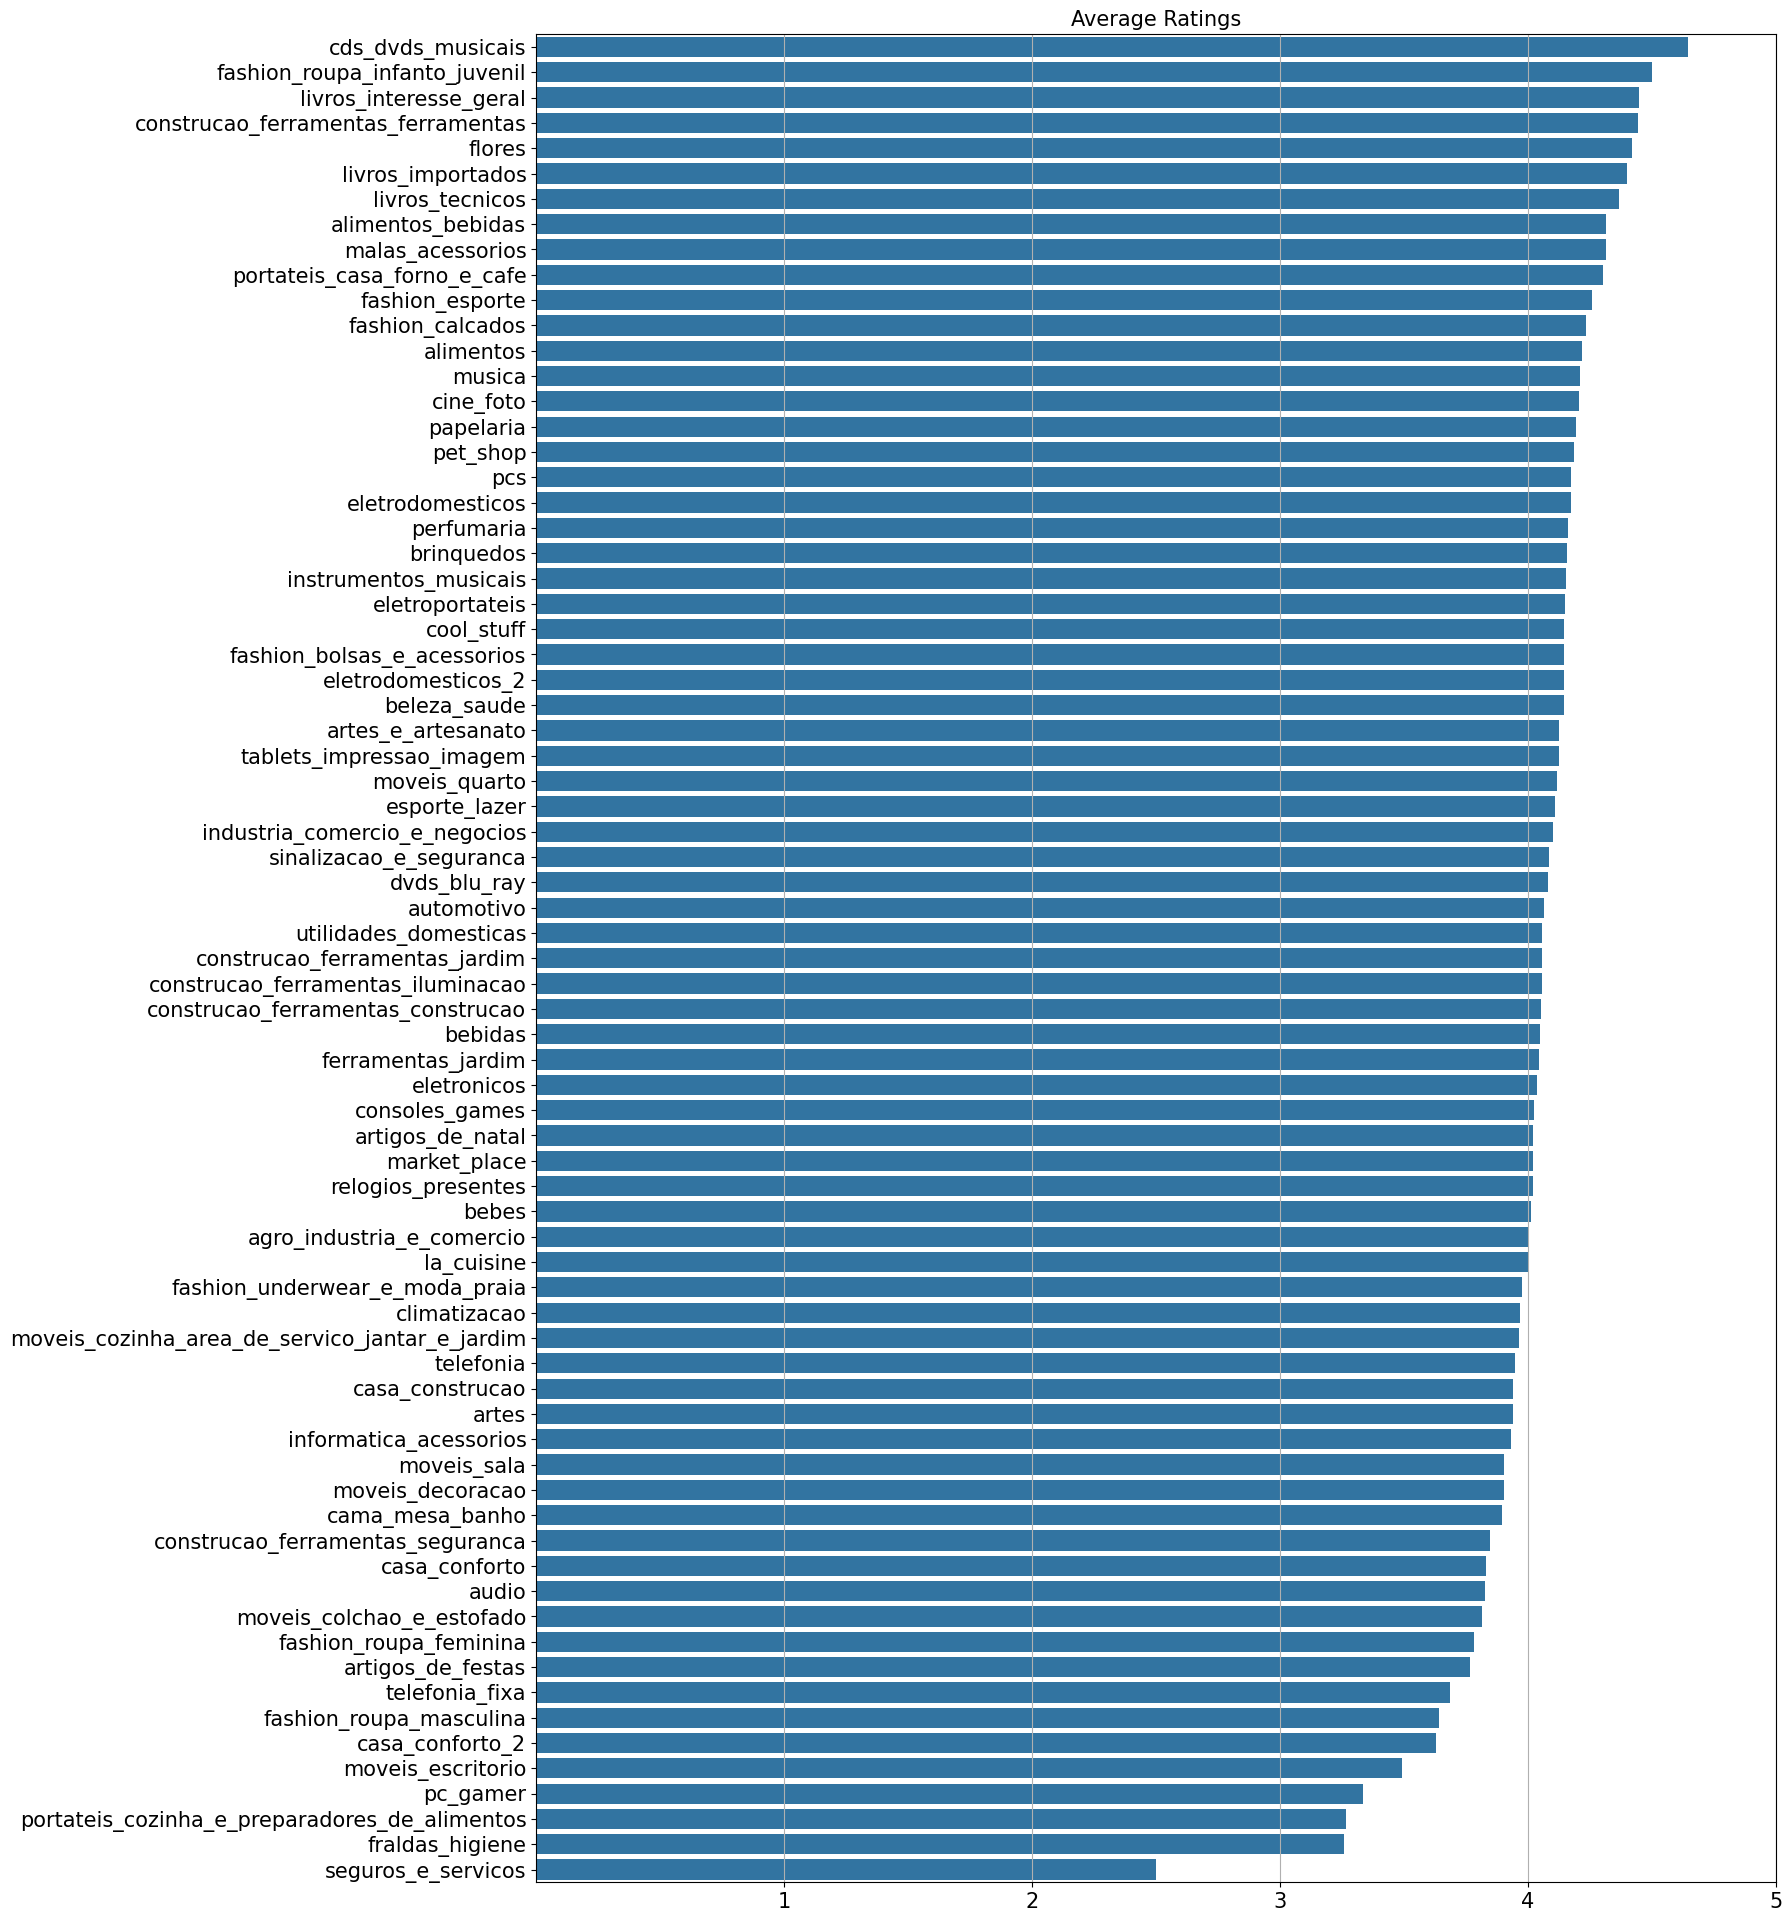

In [149]:
# Visualisasi dari produk terbaik dan terburuk

fig, ax = plt.subplots(figsize=(16, 24))

sns.barplot(
    x='review_score', 
    y='product_category_name', 
    data=product_avg_df.sort_values('review_score', ascending=False),
    ax=ax,
    orient='y'
)

ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_xticks(np.arange(1, 6))
ax.set_title('Average Ratings', loc='center', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.grid(True, axis='x')

plt.show()

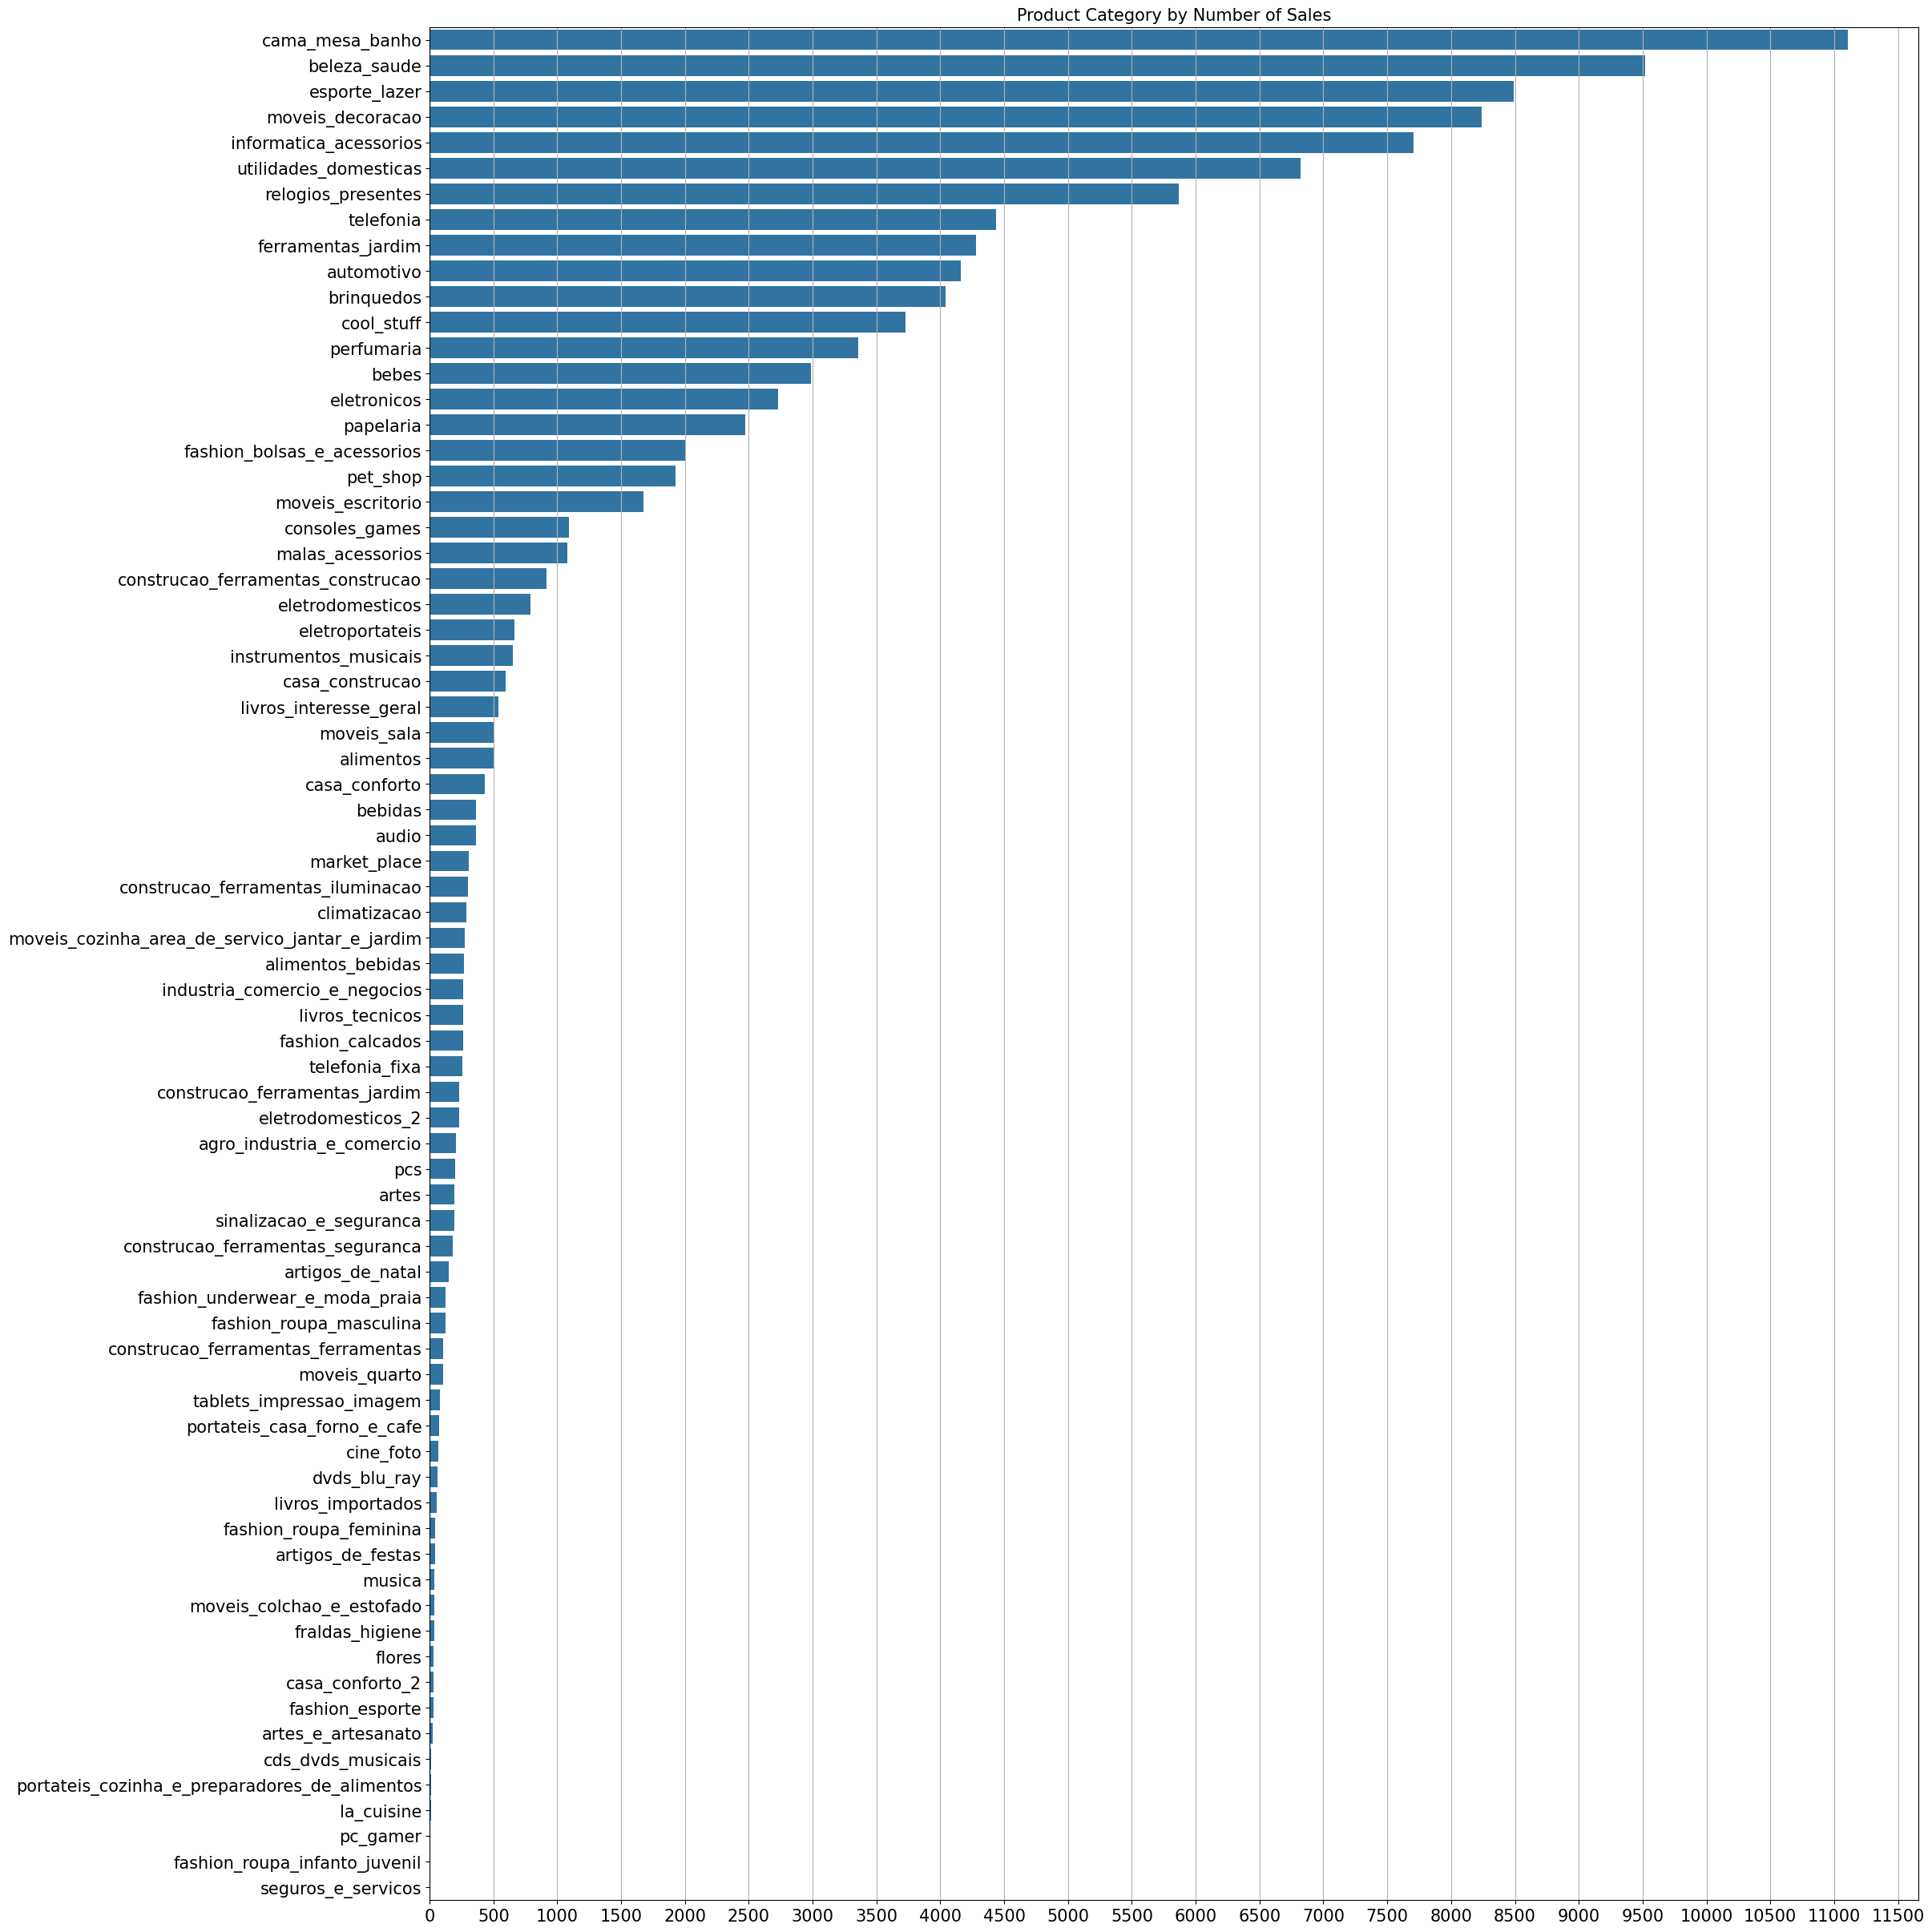

In [150]:
# Visualisasi kategori produk berdasarkan total penjualan

fig, ax = plt.subplots(figsize=(24, 24), layout='constrained')

sns.barplot(
    x='number_of_sales', 
    y='product_category_name', 
    data=product_sum_df.sort_values('number_of_sales', ascending=False), 
    ax=ax,
    orient='y',
)

ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title('Product Category by Number of Sales', loc='center', fontsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(500))
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.grid(True, axis='x')

plt.show()

In [151]:
# Buat visualisasi persebaran pembeli menggunakan Folium

geometry = geopandas.points_from_xy(customer_full_df.geolocation_lng, customer_full_df.geolocation_lat)
geo_df = geopandas.GeoDataFrame(customer_full_df, geometry=geometry)

world = geopandas.read_file(geodatasets.get_path("naturalearth.land"))

map = folium.Map(location=[15, 30], tiles="Cartodb dark_matter", zoom_start=2)

plugins.FastMarkerCluster([[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry]).add_to(map)

map

In [152]:
# Analisis RFM

rfm_df = order_full_df.groupby('customer_id', as_index=False).agg({
    'order_id': 'nunique',
    'order_purchase_timestamp': 'max',
    'total_price': 'sum',
})

rfm_df.info()

rfm_df.columns = ['customer_id', 'frequency', 'max_order_timestamp', 'monetary']

rfm_df['max_order_timestamp'] = rfm_df['max_order_timestamp'].dt.date
recent_date = order_full_df['order_purchase_timestamp'].dt.date.max()
rfm_df['recency'] = rfm_df['max_order_timestamp'].apply(lambda x: (recent_date - x).days)

rfm_df.drop('max_order_timestamp', axis=1, inplace=True)
rfm_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98666 entries, 0 to 98665
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_id               98666 non-null  object        
 1   order_id                  98666 non-null  int64         
 2   order_purchase_timestamp  98666 non-null  datetime64[ns]
 3   total_price               98666 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.0+ MB


customer_id  frequency  monetary  recency
0      00012a2ce6f8dcda20d059ce98491703          1    114.74      293
1      000161a058600d5901f007fab4c27140          1     67.41      414
2      0001fd6190edaaf884bcaf3d49edf079          1    195.42      552
3      0002414f95344307404f0ace7a26f1d5          1    179.35      383
4      000379cdec625522490c315e70c7a9fb          1    107.01      154
...                                 ...        ...       ...      ...
98661  fffcb937e9dd47a13f05ecb8290f4d3e          1     91.91      170
98662  fffecc9f79fd8c764f843e9951b11341          1     81.36      158
98663  fffeda5b6d849fbd39689bb92087f431          1     63.13      104
98664  ffff42319e9b2d713724ae527742af25          1    214.13       82
98665  ffffa3172527f765de70084a7e53aae8          1     45.50      366

[98666 rows x 4 columns]

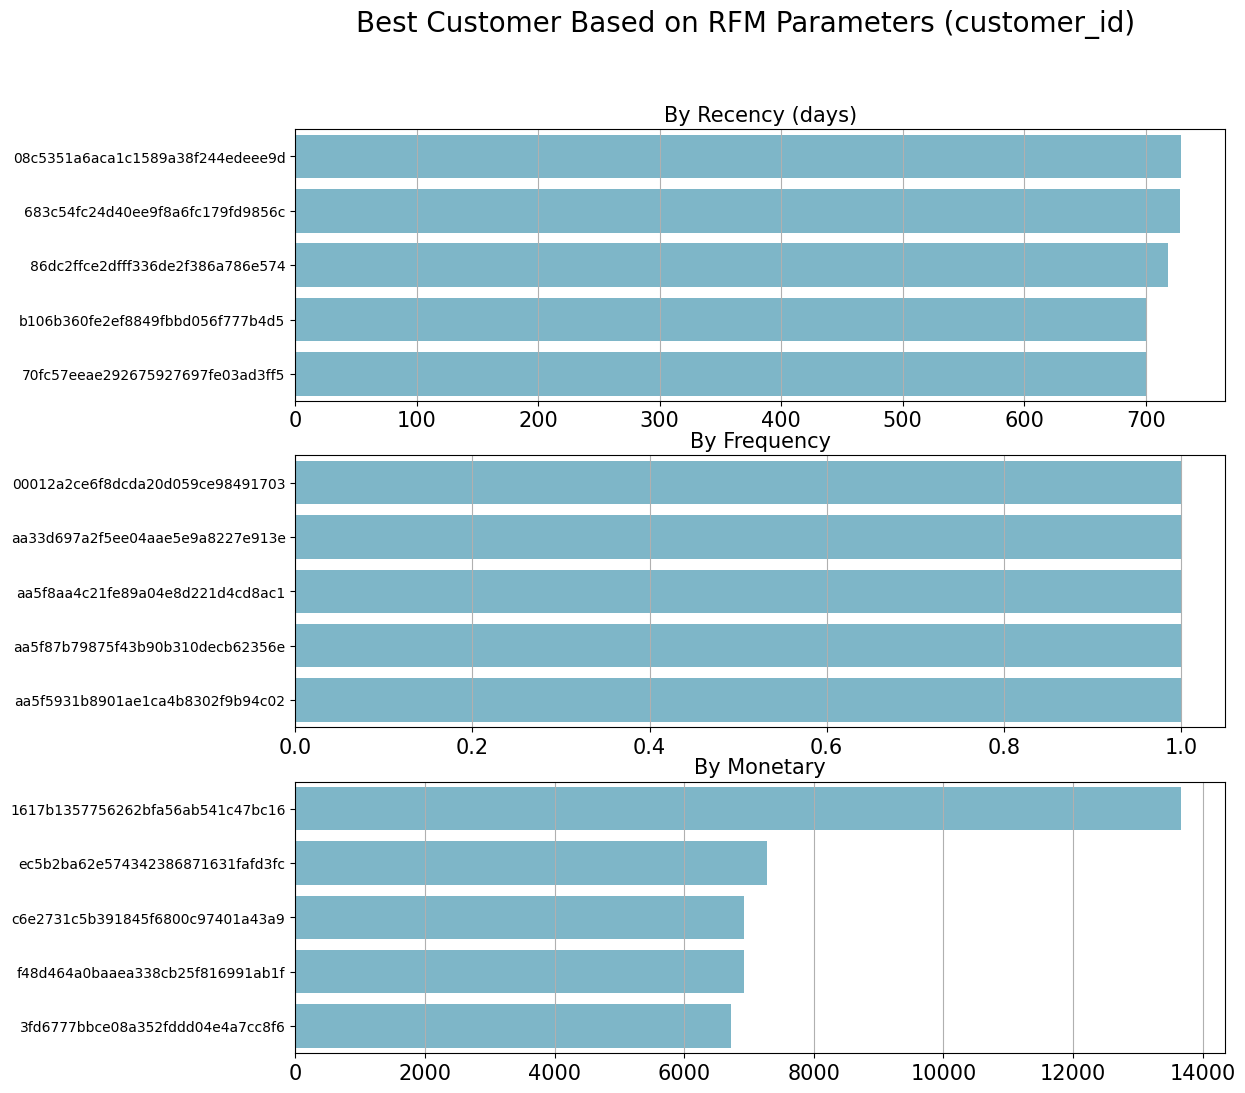

In [153]:
# Visualisasi RFM

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 12))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
 
sns.barplot(
    x="recency", 
    y="customer_id", 
    data=rfm_df.sort_values(by="recency", ascending=False).head(5), 
    palette=colors, 
    ax=ax[0],
    hue='customer_id',
)

ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=15)
ax[0].tick_params(axis ='x', labelsize=15)
ax[0].grid(True, axis='x')
 
sns.barplot(
    x="frequency", 
    y="customer_id", 
    data=rfm_df.sort_values(by="frequency", ascending=False).head(5), 
    palette=colors, 
    ax=ax[1],
    hue='customer_id',
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=15)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].grid(True, axis='x')
 
sns.barplot(
    x="monetary", 
    y="customer_id", 
    data=rfm_df.sort_values(by="monetary", ascending=False).head(5), 
    palette=colors, 
    ax=ax[2],
    hue='customer_id',
)
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=15)
ax[2].tick_params(axis='x', labelsize=15)
ax[2].grid(True, axis='x')
 
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

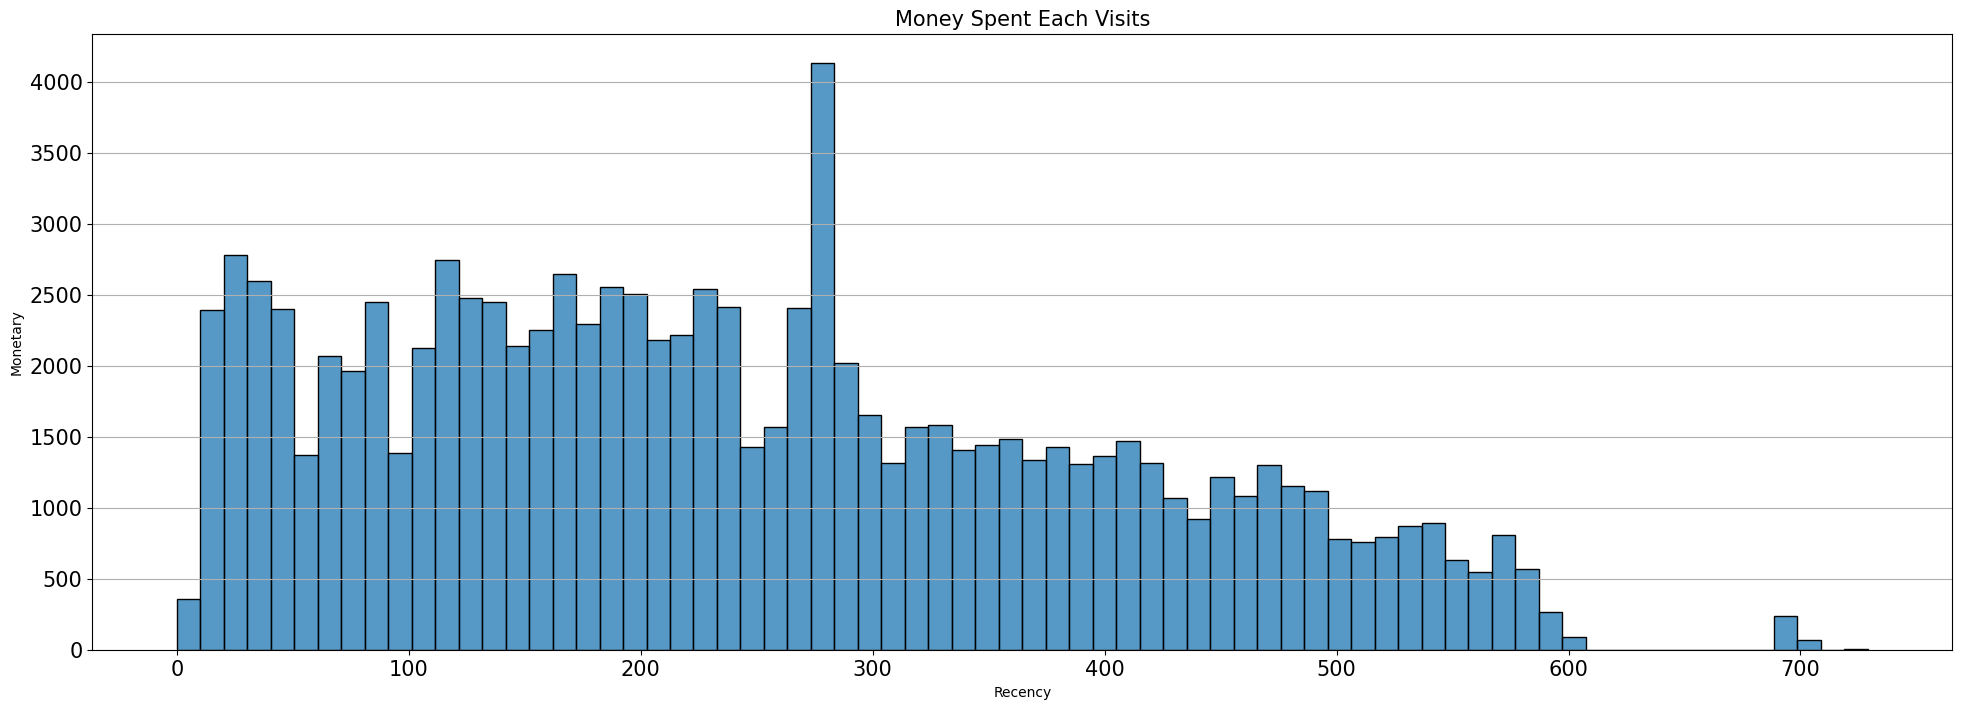

In [154]:
# Binning

fig, ax = plt.subplots(figsize=(24, 8))

sns.histplot(rfm_df, x='recency', ax=ax)

ax.set_ylabel('Monetary')
ax.set_xlabel('Recency')
ax.set_title("Money Spent Each Visits", loc="center", fontsize=15)
ax.tick_params(axis ='x', labelsize=15)
ax.tick_params(axis ='y', labelsize=15)
ax.grid(True, axis='y')

plt.show()